# Final Project (Maria Neves) - The Rumos Bank Marketing Campaign


Depois do vosso sucesso no primeiro projecto no The Rumos Bank, surge um novo projecto ainda mais empolgante! 

A equipa de marketing quer lançar uma nova campanha cujo objetivo é convencer os clientes a abrir depósitos a prazo.

Até agora a estratégia era ligar ao máximo número de pessoas, de forma indiscriminada, e tentar vender-lhe o produto. No entanto essa abordagem, para além de gastar mais recursos porque implica ter várias pessoas a ligar a todos os clientes, também é incomóda para alguns clientes que não gostam de ser incomodados com esse tipo de chamadas. Feitas as contas, chegou-se à conclusão que:

    - Por cada cliente identificado como um bom candidado, e é alvo da campanha mas não adere ao depósito a prazo, o banco tem um custo de 500euros.
    - Por cada cliente que é identificado como mau candidado, e como tal não é alvo da campanha mas na verdade era um bom candidado e iria aderir, o banco tem um custo de 2000euros.
    
Com base nesta informação, conseguem ajudar a equipa de marketing criando um modelo que seleccione os melhores candidatos para serem alvos da campanha, de forma a reduzir custos?


**O dataset contêm informação sobre todos os clientes que foram alvo da campanha:**

    1 - age 
    2 - job : type of job 
    3 - marital : marital status
    4 - education
    5 - default: has credit in default? 
    6 - housing: has housing loan? 
    7 - loan: has personal loan? 
    8 - pdays: number of days that passed by after the client was last contacted from a previous campaign 
    9 - previous: number of contacts performed before this campaign and for this client 
    10 - poutcome: outcome of the previous marketing campaign 
    11 - emp.var.rate: employment variation rate - quarterly indicator 
    12 - cons.price.idx: consumer price index - monthly indicator
    13 - cons.conf.idx: consumer confidence index - monthly indicator 
    14 - euribor3m: euribor 3 month rate - daily indicator 
    15 - nr.employed: number of employees - quarterly indicator 

**Output:**
    
    y: has the client subscribed a term deposit? 
    
   

#### Perguntas:

    1. Quantas features estão disponíveis? Quantos clientes?
    2. Quantos clientes têm no dataset que efectivamente aderiram ao depósito a prazo? E quantos não o fizeram?
    3. Quais são as features mais relevantes para decidir se um cliente tem mais propensão para aderir ao depósito a prazo?
    4. Qual o algoritmo que levou aos melhores resultados?
    5. Qual/Quais as métricas de avaliação que usaram para comparar a performance dos vários modelos? Porquê?
    6. Qual é o custo que o banco tem sem nenhum modelo?
    7. Qual o custo que o banco passa a ter com o vosso modelo?
    
    
    
    

In [1]:
#Import all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from category_encoders import OneHotEncoder as OHE
from sklearn.metrics import  precision_recall_curve, roc_auc_score, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score,auc, roc_curve
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

seed = 42

In [2]:
df = pd.read_csv('bank_marketing_campaign.csv')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.shape

(41188, 16)

#### 1. How many features are available? How many customers?
    - There are 16 features available in the dataset
    - There are 41188 customers.

In [5]:
# Check if we have missing values
df.isnull().values.any()

False

#### 2. How many customers in the dataset actually subscribed to the fixed-term deposit? And how many did not?

In [6]:
#Count the occurrences of each unique value in the 'y' column
df.groupby('y')['y'].count()

y
no     36548
yes     4640
Name: y, dtype: int64

    - 36548 customers did not subscribe to the fixed-term deposit. 4640 customers subscribed to the fixed-term deposit.
    - We have a imbalanced dataset.

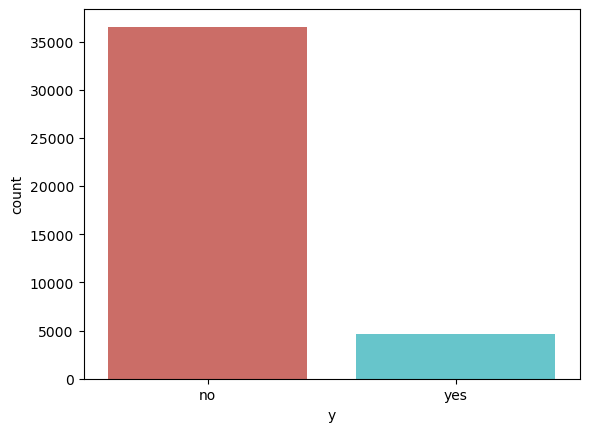

In [7]:
# Create a countplot for a categorical variable 'y' in the DataFrame 'df'
sns.countplot(x = 'y', data = df, palette ='hls')
# Display the plot
plt.show()

In [8]:
# Are there non-numeric features in the dataset?
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

We have 8 categorical features and 8 numerical features in the dataset. If we want to use all the variables, it is necessary to convert the categorical features into numerical.

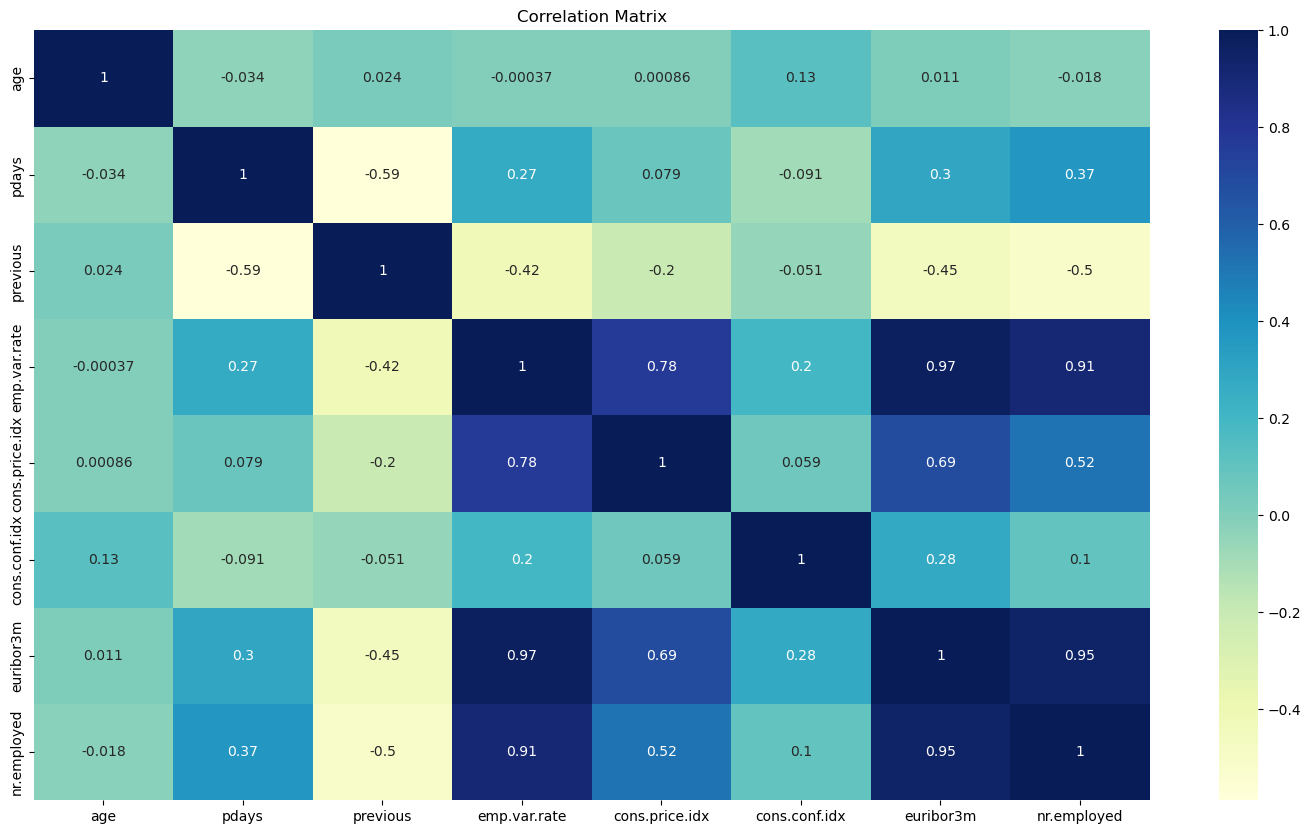

In [9]:
correlation_matrix = df.corr(numeric_only = True)

fig, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu')
plt.title("Correlation Matrix")

plt.show();

In [10]:
#Let's remove 'nr.employed' and 'previous' variables from dataset 
df = df.drop(['nr.employed', 'previous'], axis=1)

After testing various models with all the dataset variables, it was observed that it was possible to achieve a lower cost by not considering some variables, namely: 'nr.employed' and 'previous'.

Therefore, the decision was made to remove them from the dataset. We can also observe through the correlation matrix that 'previous' and 'nr.employed' have a moderate negative correlation (-0.5), indicating that as the number of previous contacts increases, the number of employees ('nr.employed') tends to decrease. 

This relationship can be interpreted as a possible implication that a higher number of previous contacts may be related to less favorable economic conditions, which can lead to a reduction in the number of employees.

We also have strong positive correlations between "emp.var.rate," "euribor3m," and "nr.employed." This suggests that these variables are somehow related and may be capturing similar information about the economic condition.

In [11]:
# Generate summary statistics for the DataFrame 'df'
df.describe()

,age,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,962.475454,0.081886,93.575664,-40.502600,3.621291
std,10.42125,186.910907,1.570960,0.578840,4.628198,1.734447
min,17.00000,0.000000,-3.400000,92.201000,-50.800000,0.634000
25%,32.00000,999.000000,-1.800000,93.075000,-42.700000,1.344000
50%,38.00000,999.000000,1.100000,93.749000,-41.800000,4.857000
75%,47.00000,999.000000,1.400000,93.994000,-36.400000,4.961000
max,98.00000,999.000000,1.400000,94.767000,-26.900000,5.045000


In [12]:
# Generate summary statistics for the non-numeric (object) columns
df.describe(include = 'object')

,job,marital,education,default,housing,loan,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,3,2
top,admin.,married,university.degree,no,yes,no,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,35563,36548


In [13]:
# Split the dataset into train and test
train_df, test_df = train_test_split(df, test_size = 0.2, random_state = seed)

In [14]:
train_df.head()

,age,job,marital,education,default,housing,loan,pdays,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y
12556,40,blue-collar,married,basic.9y,unknown,yes,no,999,nonexistent,1.4,93.918,-42.7,4.960,no
35451,31,admin.,married,university.degree,no,no,no,999,nonexistent,-1.8,92.893,-46.2,1.244,no
30592,59,retired,married,basic.4y,no,no,no,999,failure,-1.8,92.893,-46.2,1.354,no
17914,43,housemaid,divorced,basic.9y,no,yes,no,999,nonexistent,1.4,93.918,-42.7,4.961,no
3315,39,admin.,single,high.school,unknown,no,no,999,nonexistent,1.1,93.994,-36.4,4.860,no


In [15]:
# Print unique values of the 'job' feature
print('Unique values of Job feature:', df['job'].unique())

# Print unique values of the 'marital' feature
print('Unique values of marital feature:', df['marital'].unique())

# Print unique values of the 'education' feature
print('Unique values of education feature:', df['education'].unique())

# Print unique values of the 'default' feature
print('Unique values of default feature:', df['default'].unique())

# Print unique values of the 'housing' feature
print('Unique values of housing feature:', df['housing'].unique())

# Print unique values of the 'housing' feature
print('Unique values of loan feature:', df['loan'].unique())

# Print unique values of the 'poutcome' feature
print('Unique values of poutcome feature:', df['poutcome'].unique())

Unique values of Job feature: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
Unique values of marital feature: ['married' 'single' 'divorced' 'unknown']
Unique values of education feature: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
Unique values of default feature: ['no' 'unknown' 'yes']
Unique values of housing feature: ['no' 'yes' 'unknown']
Unique values of loan feature: ['no' 'yes' 'unknown']
Unique values of poutcome feature: ['nonexistent' 'failure' 'success']


In [16]:
# Create an instance of the OrdinalEncoder class
ord_encoder = OrdinalEncoder()

In [17]:
# List of columns to encode using the previously created ordinal encoder
columns_to_encode = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome', 'y']
# Apply the ordinal encoder to the specified columns in the train
train_df[columns_to_encode] = ord_encoder.fit_transform(train_df[columns_to_encode])
# Apply the same ordinal encoder (already fitted) to the specified columns in the test
test_df[columns_to_encode] = ord_encoder.transform(test_df[columns_to_encode])

In [18]:
train_df.head()

,age,job,marital,education,default,housing,loan,pdays,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y
12556,40,1.0,1.0,2.0,1.0,2.0,0.0,999,1.0,1.4,93.918,-42.7,4.960,0.0
35451,31,0.0,1.0,6.0,0.0,0.0,0.0,999,1.0,-1.8,92.893,-46.2,1.244,0.0
30592,59,5.0,1.0,0.0,0.0,0.0,0.0,999,0.0,-1.8,92.893,-46.2,1.354,0.0
17914,43,3.0,0.0,2.0,0.0,2.0,0.0,999,1.0,1.4,93.918,-42.7,4.961,0.0
3315,39,0.0,2.0,3.0,1.0,0.0,0.0,999,1.0,1.1,93.994,-36.4,4.860,0.0


In [19]:
# Splitting the training and testing datasets into features (X) and target (y) variables
# For the training dataset (train_df):
# - X_train contains the features (all columns except 'y')
# - y_train contains the target variable 'y'
X_train = train_df.drop(['y'], axis = 'columns')
y_train = train_df['y']

# For the testing dataset (test_df):
# - X_test contains the features (all columns except 'y')
# - y_test contains the target variable 'y'
X_test = test_df.drop(['y'], axis = 1)
y_test = test_df['y']

In [20]:
# Create an instance of the MinMaxScaler class
scaler = MinMaxScaler()
# List of columns to be normalized using Min-Max scaling
columns_to_normalize = ['age', 'pdays', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']
# Apply Min-Max scaling to the specified columns in the training dataset (X_train)
X_train[columns_to_normalize] = scaler.fit_transform(X_train[columns_to_normalize])
# Apply Min-Max scaling to the specified columns in the testing dataset (X_test)
X_test[columns_to_normalize] = scaler.transform(X_test[columns_to_normalize])

- True Positive: There is no additional cost, all customers have successfully subscribed.
- False Positive: The customer was identified as a good candidate but did not subscribe to the term deposit. (Associated cost of 500 euros)
- False Negative: The customer was identified as a poor candidate but was a good candidate and would have subscribed. (Associated cost of 2000 euros)
- True Negative: The customer was identified as a poor candidate, was not targeted by the campaign, and indeed did not subscribe to the term deposit.

Our target indicates that 'no' means 'does not subscribe to the term deposit,' and 'yes' means 'subscribes to the term deposit'.

First, let's calculate the baseline, which is the cost we have without any model.

$$totalCost = 500∗FP+2000∗FN$$

In [21]:
# Create an array 'y_preds_all_bad' with all elements set to 1, indicating a prediction that all cases would be classified as 'bad' (negative), meaning they did not subscribe to the term deposit.
y_preds_all_bad = np.ones(y_test.shape)

In [22]:
# Compute the confusion matrix for the baseline model by comparing 'y_test' and 'y_preds_all_bad'.
tn, fp, fn, tp = confusion_matrix(y_test, y_preds_all_bad).ravel()

print('Number of True Negatives:', tn)
print('Number of True Positives:', tp)
print('Number of False Negatives:', fn)
print('Number of False Positives:', fp)

Number of True Negatives: 0
Number of True Positives: 935
Number of False Negatives: 0
Number of False Positives: 7303


In [23]:
#Calculate the total cost associated with the baseline model where all cases are predicted as 'bad.'
totalCostBaseline_all_bad = 500 * fp
totalCostBaseline_all_bad

3651500

In [24]:
# Calculate the accuracy score by comparing the true labels 'y_test' with the predicted labels 'y_preds_all_bad'.
accuracy_score(y_test, y_preds_all_bad)

0.11349842194707453

If the customer is identified as a good candidate but does not subscribe to the term deposit, the bank incurs a cost of 3,651,500 euros.

In [25]:
# Create an array 'y_preds_all_good' with all elements set to 0, indicating a prediction that all cases would be classified as 'good' (positive), meaning they would have subscribed if contacted.
y_preds_all_good = np.zeros(y_test.shape)

In [26]:
# Compute the confusion matrix for the baseline model by comparing 'y_test' and 'y_preds_all_good'.
tn, fp, fn, tp = confusion_matrix(y_test, y_preds_all_good).ravel()

print('Number of True Negatives:', tn)
print('Number of True Positives:', tp)
print('Number of False Negatives:', fn)
print('Number of False Positives:', fp)

Number of True Negatives: 7303
Number of True Positives: 0
Number of False Negatives: 935
Number of False Positives: 0


In [27]:
#Calculate the total cost associated with the baseline model where all cases are predicted as 'good.'
totalCostBaseline_all_good = 2000 * fn
totalCostBaseline_all_good

1870000

If the customer is identified as a poor candidate but, in fact, was a good candidate and would have subscribed to the term deposit, the bank incurs a cost of 1,870,000 euros.

In [28]:
# Calculate the accuracy score by comparing the true labels 'y_test' with the predicted labels 'y_preds_all_good'.
accuracy_score(y_test, y_preds_all_good)

0.8865015780529255

In [29]:
# Define a function 'total_cost' that calculates the total cost based on model predictions and a specified threshold.
def total_cost(y_test, y_preds, threshold = 0.5):
    # Compute the confusion matrix by comparing the true labels 'y_test' with predicted labels using the threshold.
    tn, fp, fn, tp = confusion_matrix(y_test == 1, y_preds > threshold).ravel()
    # Calculate the cost associated with False Negatives
    cost_fn = fn*2000
    # Calculate the cost associated with False Positives
    cost_fp = fp*500
     # Return the total cost, which is the sum of cost associated with False Negatives and False Positives.
    return cost_fn + cost_fp

In [30]:
# Define a function 'min_cost_threshold' that calculates and visualizes the minimum cost for different thresholds.
def min_cost_threshold(y_test, y_preds):
    # Create an empty dictionary to store costs for different thresholds.
    costs = {}
    # Iterate through a range of thresholds from 0 to 1 with a step of 0.1.
    for threshold in np.arange(0, 1.1, 0.1):
        # Calculate the total cost for the given threshold and store it in the 'costs' dictionary.
        costs[round(threshold, 1)] = total_cost(y_test, y_preds, threshold = threshold)
    # Plot the threshold values against the corresponding costs.
    plt.plot(list(costs.keys()), list(costs.values()))
    plt.ylabel('Cost')
    plt.xlabel('Threshold')
    plt.show()

### Random Forest Model

In [31]:
%%time

# Create a Random Forest Classifier with a specified random seed.
rf = RandomForestClassifier(random_state = seed)
# Define a dictionary 'parameters' with hyperparameter options to search for in GridSearchCV.
parameters = {'n_estimators':[50, 100], 'max_depth':[2, 3, 4], 'min_samples_split':[2, 4, 6]}
# Perform a grid search to find the best hyperparameters using 5-fold cross-validation.
clf_rf = GridSearchCV(rf, parameters, cv =5).fit(X_train, y_train)

CPU times: total: 47.3 s
Wall time: 47.4 s


In [32]:
clf_rf.best_estimator_

RandomForestClassifier(max_depth=4, random_state=42)

In [33]:
# Generate predicted probabilities for the positive class (class 1) using the trained Random Forest model.
y_preds = clf_rf.predict_proba(X_test)[:,1]
# Calculate and print the accuracy score of the Random Forest model on the test data.
clf_rf.score(X_test, y_test)

0.8976693372177713

In [34]:
# Calculate the total cost associated with a specified threshold (0.5) using the 'total_cost' function.
total_cost(y_test, y_preds, threshold = 0.5)

1569000

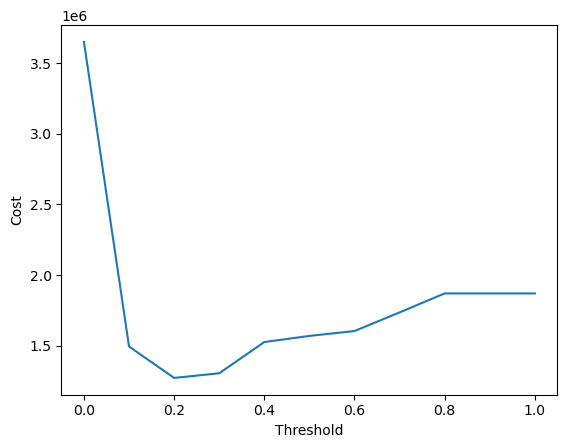

In [35]:
# Calculate and visualize the minimum cost for different threshold values using the 'min_cost_threshold' function.
min_cost_threshold(y_test, y_preds)

In [36]:
# Calculate the total cost associated with a specified threshold (0.2) using the 'total_cost' function.
total_cost(y_test, y_preds, threshold = 0.2)

1271500

### Decision Tree Model

In [37]:
%%time
# Create a Decision Tree Classifier with a specified random seed.
trees = tree.DecisionTreeClassifier(random_state = seed, class_weight = 'balanced')
# Define a dictionary 'parameters' with hyperparameter options to search for in GridSearchCV.
parameters = {'max_depth':[2, 4, 5, 6], 'min_samples_split': [4, 6, 8, 10]}

# Perform a grid search to find the best hyperparameters using 5-fold cross-validation.
clf_tree = GridSearchCV(trees, parameters, cv = 5).fit(X_train, y_train)

CPU times: total: 3.17 s
Wall time: 3.17 s


In [38]:
# Print the best estimator (model) found by GridSearchCV for the Decision Tree classifier.
clf_tree.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=6,
                       min_samples_split=10, random_state=42)

In [39]:
# Generate predicted probabilities for the positive class (class 1) using the trained Decision Tree model.
y_preds = clf_tree.predict_proba(X_test)[:,1]
# Calculate and print the accuracy score of the Decision Tree model on the test data.
clf_tree.score(X_test, y_test)

0.8284777858703569

In [40]:
# Calculate the total cost associated with a specified threshold (0.5) using the 'total_cost' function.
total_cost(y_test, y_preds, threshold = 0.5)

1263000

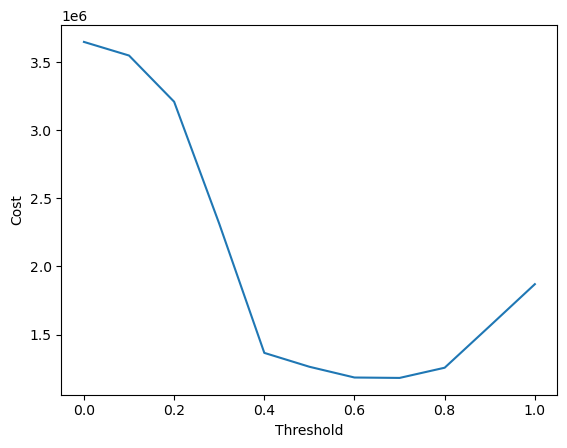

In [41]:
# Calculate and visualize the minimum cost for different threshold values using the 'min_cost_threshold' function.
min_cost_threshold(y_test, y_preds)

In [42]:
# Calculate the total cost associated with a specified threshold (0.7) using the 'total_cost' function.
total_cost(y_test, y_preds, threshold = 0.7)

1181000

In [43]:
dt = tree.DecisionTreeClassifier(**clf_tree.best_params_).fit(X_train, y_train)

In [44]:
important_features = pd.DataFrame(data = dt.feature_importances_, index = X_train.columns, columns = ['value'])
important_features.sort_values(by = 'value', ascending = False)

,value
euribor3m,0.775723
pdays,0.121332
cons.conf.idx,0.043557
cons.price.idx,0.017612
poutcome,0.015852
age,0.009547
housing,0.005362
job,0.005193
education,0.002541
marital,0.002503


### Logistic Regression Model

In [45]:
%%time
# Create a Logistic Regression classifier with specified settings.
lr = LogisticRegression(max_iter = 1000, solver = 'lbfgs', random_state = seed, class_weight = 'balanced')
# Define a dictionary 'parameters' with hyperparameter options to search for in GridSearchCV.
parameters = {'C':[1, 10, 100, 200]}
# Perform a grid search to find the best hyperparameters using 5-fold cross-validation.
clf_lr = GridSearchCV(lr, parameters, cv = 5).fit(X_train, y_train)

CPU times: total: 11 s
Wall time: 5.54 s


In [46]:
clf_lr.best_estimator_

LogisticRegression(C=100, class_weight='balanced', max_iter=1000,
                   random_state=42)

In [47]:
# Calculate and print the accuracy score of the Logistic Regression model on the test data.
clf_lr.score(X_test, y_test)

0.7623209516873027

In [48]:
# Generate predicted probabilities for the positive class (class 1) using the trained Logistic Regression model.
y_preds = clf_lr.predict_proba(X_test)[:,1]

In [49]:
# Calculate the total cost associated with a specified threshold (0.5) using the 'total_cost' function.
total_cost(y_test, y_preds, threshold = 0.5)

1438000

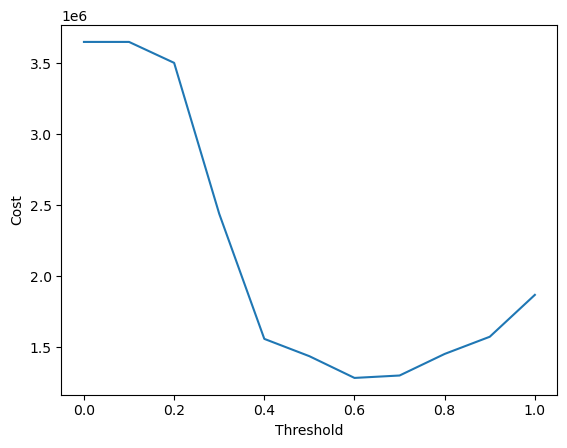

In [50]:
# Calculate and visualize the minimum cost for different threshold values using the 'min_cost_threshold' function.
min_cost_threshold(y_test, y_preds)

In [51]:
# Calculate the total cost associated with a specified threshold (0.6) using the 'total_cost' function.
total_cost(y_test, y_preds, threshold = 0.6)

1285000

### KNN 

In [52]:
%%time
# Create a K-Nearest Neighbors (KNN) classifier with default settings.
knn = KNeighborsClassifier()
# Define a dictionary 'parameters' with hyperparameter options to search for in GridSearchCV.
parameters = {'n_neighbors': range(1,10, 1)}
# Perform a grid search to find the best hyperparameter using 5-fold cross-validation.
clf_knn = GridSearchCV(knn, parameters, cv = 5).fit(X_train, y_train)

CPU times: total: 28.7 s
Wall time: 29.1 s


In [53]:
# Generate predicted probabilities for the positive class (class 1) using the trained KNN model.
y_preds = clf_knn.predict_proba(X_test)[:,1]
# Calculate and print the accuracy score of the KNN model on the test data.
clf_knn.score(X_test, y_test)

0.8918426802621996

In [54]:
# Calculate the total cost associated with a specified threshold (0.5) using the 'total_cost' function.
total_cost(y_test, y_preds, threshold = 0.5)

1642500

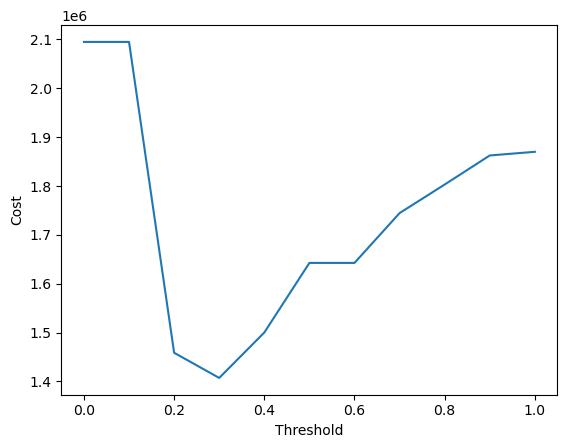

In [55]:
# Calculate and visualize the minimum cost for different threshold values using the 'min_cost_threshold' function.
min_cost_threshold(y_test, y_preds)

In [56]:
# Calculate the total cost associated with a specified threshold (0.3) using the 'total_cost' function.
total_cost(y_test, y_preds, threshold = 0.3)

1407000

### SVM

In [57]:
%%time
# Create a Support Vector Classifier (SVC) with specified settings.
svc = SVC(random_state = seed, class_weight = 'balanced', gamma = 'scale', probability = True, verbose = True)
# Define a dictionary 'parameters' with hyperparameter options to search for in GridSearchCV.
parameters = {'C': [60], 'kernel': ['rbf']}
# Perform a grid search to find the best hyperparameters using 5-fold cross-validation.
clf_svc = GridSearchCV(svc, parameters, cv = 5).fit(X_train, y_train)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]CPU times: total: 1h 2min 42s
Wall time: 1h 4min 47s


In [58]:
# Generate predicted probabilities for the positive class (class 1) using the trained Support Vector Classifier (SVC).
y_preds = clf_svc.predict_proba(X_test)[:,1]
# Calculate and print the accuracy score of the SVC model on the test data.
clf_svc.score(X_test, y_test)

0.7953386744355426

In [59]:
# Calculate the total cost associated with a specified threshold (0.5) using the 'total_cost' function.
total_cost(y_test, y_preds, threshold = 0.5)

1827000

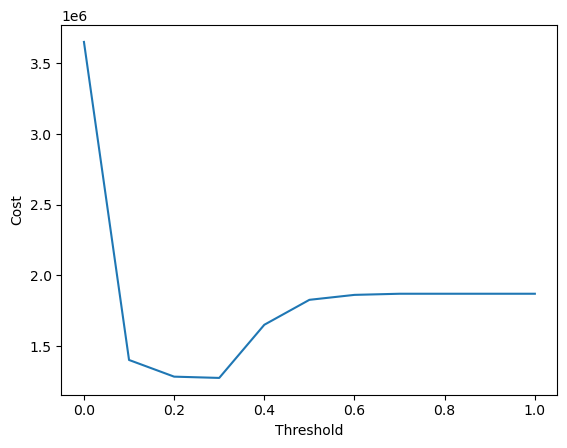

In [60]:
# Calculate and visualize the minimum cost for different threshold values using the 'min_cost_threshold' function.
min_cost_threshold(y_test, y_preds)

In [61]:
# Calculate the total cost associated with a specified threshold (0.3) using the 'total_cost' function.
total_cost(y_test, y_preds, threshold = 0.3)

1274500

### Neural Networks

In [62]:
#?MLPClassifier

In [63]:
%%time
# Create a Multi-Layer Perceptron (MLP) classifier with specified settings.
mlp = MLPClassifier(solver = 'lbfgs',  random_state = seed, max_iter = 10000)
# Define a dictionary 'parameters' with hyperparameter options to search for in GridSearchCV.
parameters = {'hidden_layer_sizes': [(20,)], 'learning_rate_init':[0.01]}
# Perform a grid search to find the best hyperparameters using 5-fold cross-validation.
clf_mlp = GridSearchCV(mlp, parameters, cv = 5).fit(X_train, y_train)

CPU times: total: 15min 35s
Wall time: 8min 16s


In [64]:
# Print the best cross-validated score achieved by the MLP classifier
clf_mlp.best_score_

0.8975417298937785

In [65]:
# Generate predicted probabilities for the positive class (class 1) using the trained MLP classifier.
y_preds = clf_mlp.predict_proba(X_test)[:,1]
# Calculate and print the accuracy score of the MLP model on the test data.
clf_mlp.score(X_test, y_test)

0.8931779558145181

In [66]:
# Calculate the total cost associated with a specified threshold (0.5) using the 'total_cost' function.
total_cost(y_test, y_preds, threshold = 0.5)

1550000

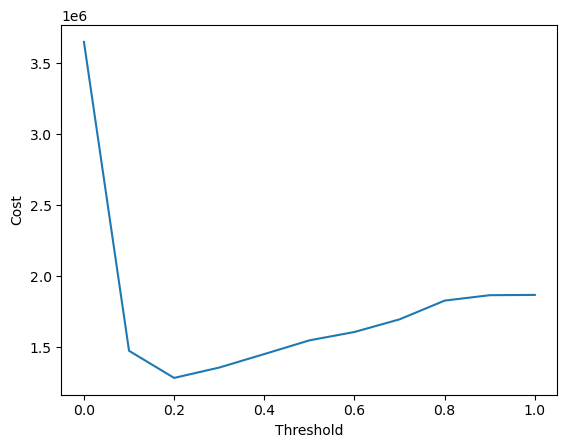

In [67]:
# Calculate and visualize the minimum cost for different threshold values using the 'min_cost_threshold' function.
min_cost_threshold(y_test, y_preds)

In [68]:
# Calculate the total cost associated with a specified threshold (0.2) using the 'total_cost' function.
total_cost(y_test, y_preds, threshold = 0.2)

1285500

    1. How many features are available? How many customers?
    - There are 16 features available in the dataset
    - There are 41188 customers.
    
    2. How many customers in the dataset actually subscribed to the fixed-term deposit? And how many did not?
        - 36548 customers did not subscribe to the fixed-term deposit. 4640 customers subscribed to the fixed-term deposit.
        
    3. What are the most relevant features to determine if a customer is more likely to subscribe to a term deposit?
    The variables that contribute the most to the model's decision on whether a customer will or will not subscribe to a term deposit are:
    - euribor 3-month rate - daily indicator
    - pdays - number of days that passed by after the client was last contacted from a previous campaign 
 
    4. Which algorithm yielded the best results?
     - The model that yielded the best results was the decision tree, with a cost of 1181000 euros.
    
    5. What evaluation metrics did you use to compare the performance of various models? Why?
     - The metric used was the total cost, as the goal of the model was to reduce the bank's costs.
    
    6. What is the cost that the bank incurs without any model?
    - The cost that the bank would incur without a model, assuming that all customers were considered weak candidates but turned out to be good candidates and would subscribe to the term deposit, is 1870000 euros.
        
    7. What is the cost the bank incurs with your model?
    - The cost the bank would incur with the model would be 1181000 euros, saving approximately 689000 euros.